In [1]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
%matplotlib inline

#propios utilitarios
from utils import *

data_train_1 = pd.read_csv('data/data_train_1.csv')
if 'Unnamed: 0' in data_train_1.columns:
    del data_train_1['Unnamed: 0']
    
data_train_2 = pd.read_csv('data/data_train_2.csv')
if 'Unnamed: 0' in data_train_2.columns:
    del data_train_2['Unnamed: 0']
data_train_1.head()

,codCliente,codEstab,ratingMonto
0,1,39,0.109690
1,1,1194,0.015868
2,1,1911,0.059998
3,1,2399,0.004772
4,1,2425,0.012395


In [2]:
data_train_2.head()

,codCliente,codEstab,ratingMonto
0,1,39,0.281029
1,1,1194,0.032772
2,1,1911,0.136354
3,1,2399,0.009632
4,1,2425,0.025417


In [3]:
data_estab = pd.read_csv('data/clean_estab.csv')
data_estab.head()

,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity,giro_popularity,estab_rant,giro_rant,bes_motnth_1,bes_motnth_10,bes_motnth_11,bes_motnth_12,bes_motnth_2,bes_motnth_3,bes_motnth_4,bes_motnth_5,bes_motnth_6,bes_motnth_7,bes_motnth_8,bes_motnth_9
0,1,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,1,0,0,0,0,0,0
2,14,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,1,0,0
3,24,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,1,0,0
4,25,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,1,0,0,0,0,0,0


In [4]:
data_perfil = pd.read_csv('data/clean_perfil.csv')
data_perfil.head()

,codCliente,flagGenero,flagLimaProvCliente,ubigeoCliente,flagBxi,rangoEdad_Rango1,rangoEdad_Rango2,rangoEdad_Rango3,rangoEdad_Rango4,rangoEdad_Rango5,...,saldoTcEntidad4_Rango2,saldoTcEntidad4_Rango3,saldoTcEntidad4_Rango4,saldoTcEntidad4_Rango5,saldoTcEntidad4_Rango6,perfil_6,perfil_7,perfil_8,perfil_9,perfil_10
0,24041,1,0,360,1,0,1,0,0,0,...,0,0,0,0,0,1,1,1,5,1
1,9040,1,1,260,1,0,0,0,1,0,...,0,0,0,0,0,5,5,5,1,5
2,18233,1,1,273,1,0,1,0,0,0,...,0,0,0,0,0,5,6,6,3,3
3,7226,0,1,241,1,0,0,0,0,1,...,1,0,0,0,0,5,5,7,8,8
4,21617,1,1,268,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,5,1


In [5]:
data_train_1 = data_train_1.merge(data_perfil, on='codCliente')
data_train_1 = data_train_1.merge(data_estab, on='codEstab')
data_train_1.head()

,codCliente,codEstab,ratingMonto,flagGenero,flagLimaProvCliente,ubigeoCliente,flagBxi,rangoEdad_Rango1,rangoEdad_Rango2,rangoEdad_Rango3,...,bes_motnth_11,bes_motnth_12,bes_motnth_2,bes_motnth_3,bes_motnth_4,bes_motnth_5,bes_motnth_6,bes_motnth_7,bes_motnth_8,bes_motnth_9
0,1,39,0.109690,1,1,246,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,62,39,0.047317,1,1,257,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,310,39,0.016559,1,1,250,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,378,39,0.068168,0,1,275,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,443,39,0.008400,1,1,256,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
del data_train_1['ubigeoCliente']
del data_train_1['ubigeoEstab']

In [7]:
data_train_2 = data_train_2.merge(data_perfil, on='codCliente')
data_train_2 = data_train_2.merge(data_estab, on='codEstab')
data_train_2.head()

,codCliente,codEstab,ratingMonto,flagGenero,flagLimaProvCliente,ubigeoCliente,flagBxi,rangoEdad_Rango1,rangoEdad_Rango2,rangoEdad_Rango3,...,bes_motnth_11,bes_motnth_12,bes_motnth_2,bes_motnth_3,bes_motnth_4,bes_motnth_5,bes_motnth_6,bes_motnth_7,bes_motnth_8,bes_motnth_9
0,1,39,0.281029,1,1,246,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,62,39,0.104523,1,1,257,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,310,39,0.034250,1,1,250,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,378,39,0.157853,0,1,275,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,443,39,0.017084,1,1,256,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
del data_train_2['ubigeoCliente']
del data_train_2['ubigeoEstab']

In [9]:
data_train_2.head()

,codCliente,codEstab,ratingMonto,flagGenero,flagLimaProvCliente,flagBxi,rangoEdad_Rango1,rangoEdad_Rango2,rangoEdad_Rango3,rangoEdad_Rango4,...,bes_motnth_11,bes_motnth_12,bes_motnth_2,bes_motnth_3,bes_motnth_4,bes_motnth_5,bes_motnth_6,bes_motnth_7,bes_motnth_8,bes_motnth_9
0,1,39,0.281029,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,62,39,0.104523,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,310,39,0.034250,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,378,39,0.157853,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,443,39,0.017084,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
data_train_1.shape, data_train_2.shape

((901967, 70), (901967, 70))

In [11]:
list(data_train_1.columns) == list(data_train_2.columns)

True

## MODEL

In [17]:
import lightgbm as lgb
X_train_1 = data_train_1.sort_values(by=['codCliente', 'codEstab']).drop(['ratingMonto', 'codCliente', 'codEstab'], axis=1).values
y_train_1 = data_train_1['ratingMonto'].values
X_train_2 = data_train_2.sort_values(by=['codCliente', 'codEstab']).drop(['ratingMonto', 'codCliente', 'codEstab'], axis=1).values
y_train_2 = data_train_2['ratingMonto'].values

In [18]:
X_train_1.shape, X_train_2.shape, type(X_train_1), type(y_train_1)

((901967, 67), (901967, 67), numpy.ndarray, numpy.ndarray)

In [72]:
"""
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
scaler_1.fit(X_train_1)
scaler_2 = StandardScaler()
scaler_2.fit(X_train_2)
"""

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
"""
X_train_1_scaler =  scaler_1.transform(X_train_1)
X_train_2_scaler =  scaler_2.transform(X_train_2)
X_train_1_scaler.shape, X_train_2_scaler.shape
"""

In [21]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import KFold

foldd =  KFold(n_splits=3, random_state=2, shuffle=False)

est = linear_model.Ridge(alpha=0.1, normalize=True)
cv_result = model_selection.cross_validate(
    est, 
    X=X_train_1, 
    y=y_train_1, 
    cv=foldd, 
    return_train_score=True, 
    scoring='neg_mean_squared_error'
)
est.fit(X_train_1, y_train_1)

#Get each vaiable name with its coeficient
coef_list=sorted(zip(data_train_1.drop(['ratingMonto', 'codCliente', 'codEstab'], axis=1).columns, np.abs(est.coef_)), key=lambda tup: tup[1], reverse=True)
coef_list[:5]

[('estab_rant', 0.004682377365554067),
 ('giro_rant', 0.0038992259673509876),
 ('rangoCtdProdSeg_Rango4', 0.0016466935010609172),
 ('rangoEdad_Rango1', 0.001562260950357123),
 ('rangoCtdProdAct_Rango3', 0.001220710260216531)]

In [27]:
ridge_df = pd.DataFrame(coef_list)
ridge_df = ridge_df.sort_values(1, ascending=True)
ridge_df['ridge_ord']=ridge_df.index
ridge_df.head(10)

,0,1,ridge_ord
66,perfil_7,0.000001,66
65,bes_motnth_2,0.000002,65
64,flagGenero,0.000003,64
63,saldoTcEntidad2_Rango2,0.000005,63
62,perfil_10,0.000005,62
61,perfil_9,0.000006,61
60,rangoCtdProdSeg_Rango1,0.000017,60
59,perfil_8,0.000022,59
58,saldoTcEntidad4_Rango3,0.000022,58
57,saldoTcEntidad1_Rango1,0.000026,57


In [31]:
ridge_df.shape

(67, 3)

In [44]:
cols_model = list(ridge_df[0][-45:])
for col in cols_model:
    if col.strip().startswith('bes_motnth_') or col == 'bes_motnth_4' :
        cols_model.remove(col)

print(cols_model)
cols_model = cols_model[:2] + cols_model[3:]
print(cols_model)

['saldoTcEntidad4_Rango5', 'flagLimaProvEstab', 'bes_motnth_4', 'saldoTcEntidad3_Rango1', 'saldoTcEntidad3_Rango6', 'saldoTcEntidad1_Rango2', 'rangoEdad_Rango5', 'rangoIngreso_Rango2', 'saldoTcEntidad2_Rango4', 'rangoIngreso_Rango5', 'saldoTcEntidad3_Rango3', 'saldoTcEntidad2_Rango3', 'flagBxi', 'saldoTcEntidad4_Rango2', 'flagLimaProvCliente', 'saldoTcEntidad1_Rango6', 'saldoTcEntidad3_Rango4', 'saldoTcEntidad4_Rango4', 'saldoTcEntidad1_Rango3', 'rangoCtdProdPas_Rango3', 'saldoTcEntidad1_Rango4', 'giro_popularity', 'saldoTcEntidad1_Rango5', 'rangoCtdProdAct_Rango1', 'rangoEdad_Rango6', 'rangoEdad_Rango3', 'saldoTcEntidad3_Rango5', 'estab_popularity', 'saldoTcEntidad2_Rango5', 'rangoIngreso_Rango1', 'rangoCtdProdSeg_Rango3', 'saldoTcEntidad3_Rango2', 'rangoIngreso_Rango4', 'rangoEdad_Rango4', 'rangoIngreso_Rango3', 'rangoIngreso_Rango6', 'rangoCtdProdAct_Rango3', 'rangoEdad_Rango1', 'rangoCtdProdSeg_Rango4', 'giro_rant', 'estab_rant']
['saldoTcEntidad4_Rango5', 'flagLimaProvEstab', 'sal

In [46]:
X_train_1 = data_train_1[[*cols_model]]

In [47]:
X_train_1.shape

(901967, 40)

In [38]:
"""
scaler_1 = StandardScaler()
scaler_1.fit(X_train_1)
X_train_1_scaler =  scaler_1.transform(X_train_1)
X_train_1_scaler.shape
"""

(901967, 28)

In [50]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 20, 30],
    'n_estimators': [50, 100, 250]
}

lgb_regressor = lgb.LGBMRegressor(
    save_binary=True,
    objective='regression',
    max_bin=255,
    learning_rate=0.1,
    bagging_fraction=0.75
)

gbm_1 = GridSearchCV(lgb_regressor, param_grid, cv=foldd, n_jobs=4, scoring='neg_mean_squared_error')
gbm_1.fit(X_train_1, y_train_1)

best_params_1 = gbm_1.best_params_
model_1 = gbm_1.best_estimator_
score_1 = gbm_1.best_score_
score_1

-0.0006590885749473049

In [51]:
best_params_1

{'max_depth': 20, 'n_estimators': 250}

In [52]:
np.sqrt(-1*score_1)

0.025672720443055987

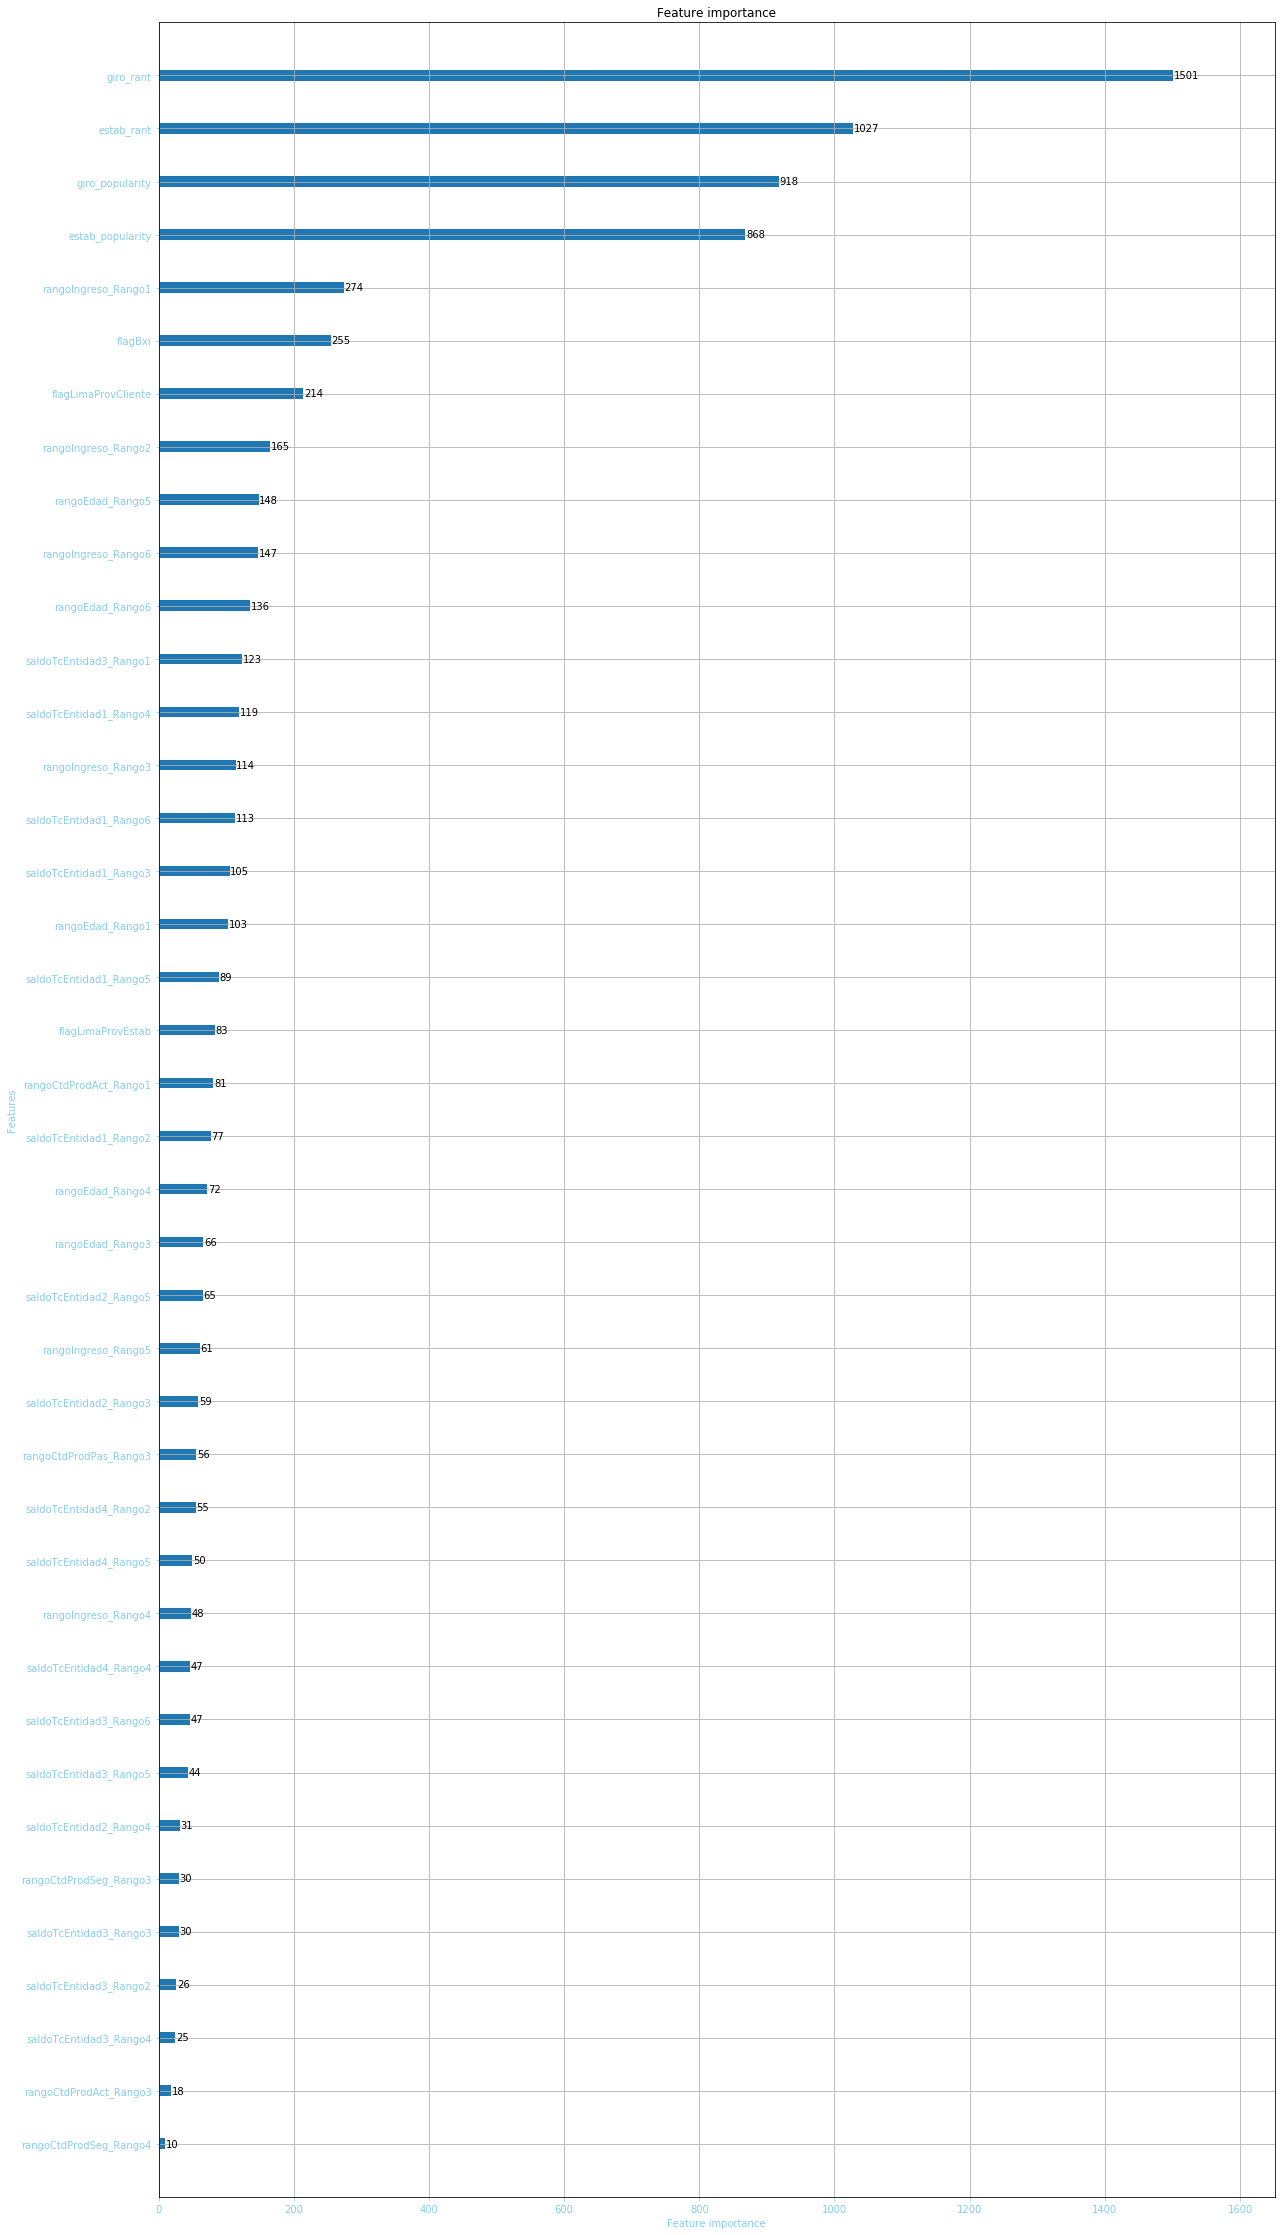

In [53]:
graf = lgb.plot_importance(model_1, max_num_features=70, figsize=(20, 40))
graf.xaxis.label.set_color('skyblue')
graf.yaxis.label.set_color('skyblue')
graf.tick_params(colors='skyblue')
plt.show()

In [91]:
data_test = pd.read_csv('data/data_test.csv')[[*cols_model]]
if 'Unnamed: 0' in data_test.columns:
    del data_test['Unnamed: 0']
data_test.head()

,saldoTcEntidad4_Rango5,flagLimaProvEstab,saldoTcEntidad3_Rango1,saldoTcEntidad3_Rango6,saldoTcEntidad1_Rango2,rangoEdad_Rango5,rangoIngreso_Rango2,saldoTcEntidad2_Rango4,rangoIngreso_Rango5,saldoTcEntidad3_Rango3,...,saldoTcEntidad3_Rango2,rangoIngreso_Rango4,rangoEdad_Rango4,rangoIngreso_Rango3,rangoIngreso_Rango6,rangoCtdProdAct_Rango3,rangoEdad_Rango1,rangoCtdProdSeg_Rango4,giro_rant,estab_rant
0,0,1.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.036301,0.020472
1,0,1.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.023960,0.017761
2,0,0.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.018220,0.018220
3,0,NaN,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,0,0.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.007758,0.016423


In [92]:
if 'ubigeoCliente' in data_test.columns:
    del data_test['ubigeoCliente']

if 'ubigeoEstab' in data_test.columns:
    del data_test['ubigeoEstab']
    
data_test.columns

Index(['saldoTcEntidad4_Rango5', 'flagLimaProvEstab', 'saldoTcEntidad3_Rango1',
       'saldoTcEntidad3_Rango6', 'saldoTcEntidad1_Rango2', 'rangoEdad_Rango5',
       'rangoIngreso_Rango2', 'saldoTcEntidad2_Rango4', 'rangoIngreso_Rango5',
       'saldoTcEntidad3_Rango3', 'saldoTcEntidad2_Rango3', 'flagBxi',
       'saldoTcEntidad4_Rango2', 'flagLimaProvCliente',
       'saldoTcEntidad1_Rango6', 'saldoTcEntidad3_Rango4',
       'saldoTcEntidad4_Rango4', 'saldoTcEntidad1_Rango3',
       'rangoCtdProdPas_Rango3', 'saldoTcEntidad1_Rango4', 'giro_popularity',
       'saldoTcEntidad1_Rango5', 'rangoCtdProdAct_Rango1', 'rangoEdad_Rango6',
       'rangoEdad_Rango3', 'saldoTcEntidad3_Rango5', 'estab_popularity',
       'saldoTcEntidad2_Rango5', 'rangoIngreso_Rango1',
       'rangoCtdProdSeg_Rango3', 'saldoTcEntidad3_Rango2',
       'rangoIngreso_Rango4', 'rangoEdad_Rango4', 'rangoIngreso_Rango3',
       'rangoIngreso_Rango6', 'rangoCtdProdAct_Rango3', 'rangoEdad_Rango1',
       'rangoCtdProdSeg_

In [93]:
data_test.shape, X_train_1.shape

((467203, 40), (901967, 40))

In [94]:
null_verificator(data_test)

,Nulos,Cantidad,Tipo Col
saldoTcEntidad4_Rango5,False,0,int64
flagLimaProvEstab,True,8993,float64
saldoTcEntidad3_Rango1,False,0,int64
saldoTcEntidad3_Rango6,False,0,int64
saldoTcEntidad1_Rango2,False,0,int64
rangoEdad_Rango5,False,0,int64
rangoIngreso_Rango2,False,0,int64
saldoTcEntidad2_Rango4,False,0,int64
rangoIngreso_Rango5,False,0,int64
saldoTcEntidad3_Rango3,False,0,int64


In [105]:
for col in data_test.columns:
    if data_test[col].isnull().any():
        print(col)

flagLimaProvEstab
giro_popularity
estab_popularity
giro_rant
estab_rant


In [113]:
data_train_1.groupby(by=['flagLimaProvEstab'])['ratingMonto'].count()

flagLimaProvEstab
0    190422
1    711545
Name: ratingMonto, dtype: int64

In [118]:
media_cliente_giro = data_train_1.groupby(by=['codCliente'])['giro_popularity'].mean()

(pandas.core.series.Series, 0.05231898290147418)

In [119]:
media_cliente_estab = data_train_1.groupby(by=['codCliente'])['estab_popularity'].mean()

In [120]:
media_cliente_giro_rant = data_train_1.groupby(by=['codCliente'])['giro_rant'].mean()

In [121]:
media_cliente_estab_rant = data_train_1.groupby(by=['codCliente'])['estab_rant'].mean()

In [122]:
data_test['flagLimaProvEstab'] = data_test['flagLimaProvEstab'].apply(lambda x: 1 if x not in [0, 1] else x)

In [128]:
data_test['giro_rant'] = data_test['giro_rant'].apply(lambda x: media_cliente_giro_rant[x] if x in [np.NaN, np.NaN, None] else x)

In [129]:
data_test['giro_rant']

0         0.036301
1         0.023960
2         0.018220
3              NaN
4         0.007758
5         0.008780
6         0.027255
7         0.008780
8         0.007758
9         0.008780
10        0.041581
11        0.010207
12        0.010207
13        0.010207
14        0.010207
15        0.016063
16        0.017628
17        0.017628
18        0.009622
19        0.009622
20        0.009622
21        0.009622
22        0.009622
23        0.009622
24        0.009622
25        0.009622
26        0.009622
27        0.009622
28        0.009622
29        0.009622
            ...   
467173    0.010207
467174    0.016063
467175    0.023014
467176    0.008780
467177    0.008780
467178    0.005824
467179    0.023014
467180    0.008780
467181    0.008780
467182    0.011083
467183    0.004825
467184    0.009096
467185    0.004825
467186    0.007953
467187    0.010207
467188    0.007953
467189    0.008780
467190    0.008780
467191    0.018220
467192    0.010207
467193    0.010207
467194    0.

In [65]:
moda_flag = data_test['flagBxi'].mode()
data_test['flagBxi'].fillna(moda_flag, inplace=True)

In [66]:
data_test['giro_popularity'].fillna(data_test['giro_popularity'].mean(), inplace=True)
data_test['estab_popularity'].fillna(data_test['estab_popularity'].mean(), inplace=True)
data_test['giro_rant'].fillna(data_test['giro_rant'].mean(), inplace=True)
data_test['estab_rant'].fillna(data_test['estab_rant'].mean(), inplace=True)

In [85]:
null_verificator(data_test)

'DATA LIMPIA DE NULOS'

In [86]:
list(data_test.columns) ==  list(X_train_1.columns)

True

In [87]:
y_pred_1 = model_1.predict(data_test, num_iterarion=model_1.best_iteration_)

In [88]:
type(y_pred_1), y_pred_1.shape

(numpy.ndarray, (467203,))

In [89]:
data_test_other = pd.read_csv('data/data_test.csv')[['codCliente', 'codEstab']]
data_test_other['prediction'] = pd.Series(y_pred_1)
data_test_other.head(10)

,codCliente,codEstab,prediction
0,1,39,0.023918
1,1,3843,0.019163
2,1,6314,0.008346
3,1,12767,0.009391
4,1,26260,0.009756
5,1,29255,0.006667
6,1,35247,0.011925
7,1,36889,0.006667
8,1,38534,0.009239
9,1,46867,0.006667


In [90]:
data_test_other.to_csv('data/data_result_4.csv', index=False)